# Multiple Linear Regression

## Importing the libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

## Importing the dataset

In [83]:
df = pd.read_csv('50_Startups.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Encoding categorical data

In [84]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [85]:
encoder = ColumnTransformer(
    transformers = [('encoder', OneHotEncoder(), [3])],
    remainder = 'passthrough'
)

X = np.array(encoder.fit_transform(X))

# = pd.get_dummies(X, drop_first = True)


In [86]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

## Splitting the dataset into the Training set and Test set

In [87]:
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=.2, random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [94]:
mlr_model = LinearRegression().fit(X_train, y_train)

## Predicting the Test set results

In [95]:
mlr_model

LinearRegression()

In [96]:
y_predict = mlr_model.predict(X_test)

In [151]:
# outmoded
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_predict.reshape(len(y_predict), 1)), 1))

[[103282.38 103015.2 ]
 [144259.4  132582.28]
 [146121.95 132447.74]
 [ 77798.83  71976.1 ]
 [191050.39 178537.48]
 [105008.31 116161.24]
 [ 81229.06  67851.69]
 [ 97483.56  98791.73]
 [110352.25 113969.44]
 [166187.94 167921.07]]


In [139]:
result = pd.DataFrame(np.array([y_test, y_predict]).transpose(), columns=['y_test', 'y_predict'])
result

,y_test,y_predict
0,103282.38,103015.201598
1,144259.40,132582.277608
2,146121.95,132447.738452
3,77798.83,71976.098513
4,191050.39,178537.482211
5,105008.31,116161.242302
6,81229.06,67851.692097
7,97483.56,98791.733747
8,110352.25,113969.435330
9,166187.94,167921.065696


In [143]:
pd.DataFrame([y_test, y_predict], index=['y_test', 'y_predict']).transpose()

,y_test,y_predict
0,103282.38,103015.201598
1,144259.40,132582.277608
2,146121.95,132447.738452
3,77798.83,71976.098513
4,191050.39,178537.482211
5,105008.31,116161.242302
6,81229.06,67851.692097
7,97483.56,98791.733747
8,110352.25,113969.435330
9,166187.94,167921.065696


In [149]:
print(np.array([y_test, y_predict]).transpose())

[[103282.38 103015.2 ]
 [144259.4  132582.28]
 [146121.95 132447.74]
 [ 77798.83  71976.1 ]
 [191050.39 178537.48]
 [105008.31 116161.24]
 [ 81229.06  67851.69]
 [ 97483.56  98791.73]
 [110352.25 113969.44]
 [166187.94 167921.07]]


<Axes: >

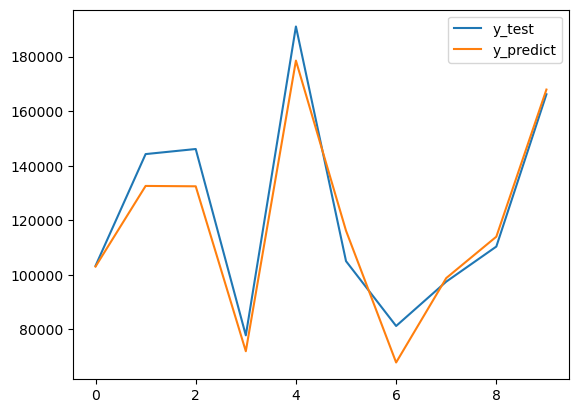

In [152]:
result.plot()

### How do I use my multiple linear regression model to make a single prediction, for example, the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = California?



In [159]:
mlr_model.predict([[1, 0, 0, 160000, 130000, 300000]])

array([181566.92])

###     How do I get the final regression equation y = b0 + b1 x1 + b2 x2 + ... with the final values of the coefficients?

In [175]:
coef = np.around(mlr_model.coef_, 3)
print(f"y = {np.around(mlr_model.intercept_, 3)} + {coef[0]}.X1 + {coef[1]}.X2 + {coef[2]}.X3 + {coef[3]}.X4 + {coef[4]}.X5 + {coef[4]}.X6")


y = 42467.529 + 86.638.X1 + -872.646.X2 + 786.007.X3 + 0.773.X4 + 0.033.X5 + 0.033.X6
